In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.datasets import load_iris

In [2]:
iris=load_iris()

In [3]:
print(dir(iris))

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']


In [4]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)

In [5]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
df['target']=iris.target

In [7]:
iris.target_names[:3]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [8]:
df['target_names']=df.target.apply(lambda x:iris.target_names[x])

In [9]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [10]:
## or simply download the data from seaborn sns dataset
df=sns.load_dataset('iris')

In [11]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [12]:
X=df.iloc[:,:-1]
y=iris.target

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [14]:
from sklearn.tree import DecisionTreeClassifier

## postpruning

In [15]:
treemodel=DecisionTreeClassifier()
treemodel.fit(X_train,y_train)

DecisionTreeClassifier()

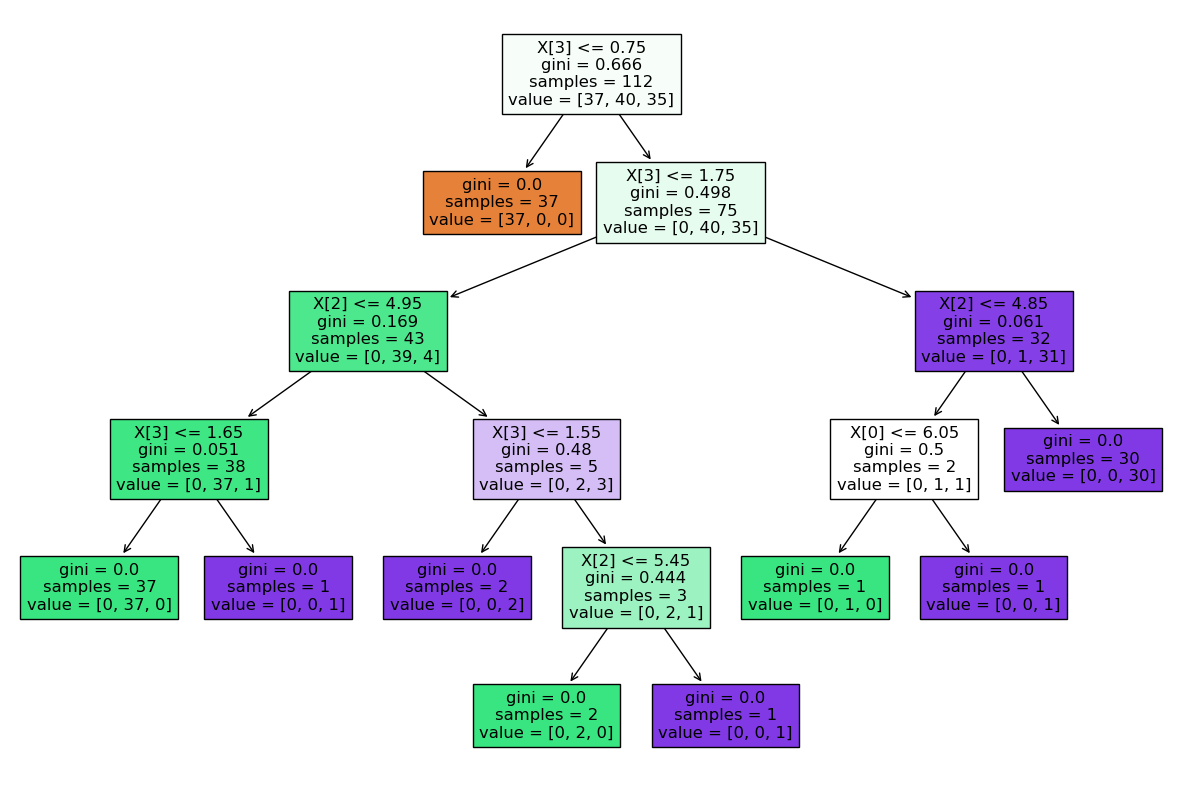

In [16]:
#plotting the tree 
from sklearn import tree 
plt.figure(figsize=(15,10))
tree.plot_tree(treemodel,filled=True);

In [17]:
treemodel.score(X_test,y_test)

0.9736842105263158

unnecessary trying to overfitting the data so we dont go to that much depth
1.we will depth to 2 level as we can its sufficient enough to predict the data 

In [18]:
treemodel=DecisionTreeClassifier(max_depth=2)
treemodel.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

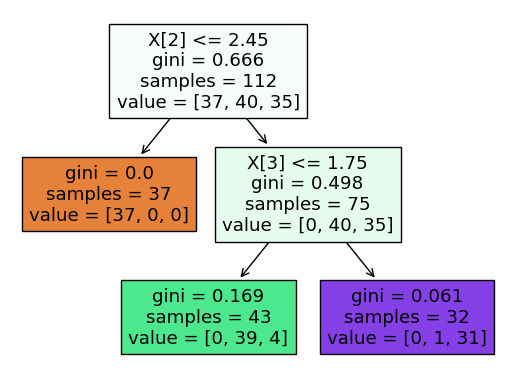

In [19]:
tree.plot_tree(treemodel,filled=True);

In [20]:
y_pred=treemodel.predict(X_test)

In [21]:
from sklearn.metrics import accuracy_score,classification_report
score =accuracy_score(y_pred,y_test)
score


0.9736842105263158

In [22]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.91      0.95        11
           2       0.93      1.00      0.97        14

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



## prepruning 

in this it means before creating model tuning the hyperparameters so that the model gives the best possible ans

That can be done using GridSearchCV 

In [23]:
## or simply download the data from seaborn sns dataset
df=sns.load_dataset('iris')

In [24]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [25]:
X=df.iloc[:,:-1]
y=iris.target

In [26]:
from sklearn.model_selection import GridSearchCV

In [27]:
print(dir(DecisionTreeClassifier())[:3])

['__abstractmethods__', '__class__', '__delattr__']


In [28]:
## Preprunning
parameter={
 'criterion':['gini','entropy','log_loss'],
  'splitter':['best','random'],
  'max_depth':[1,2,3,4,5]
    
}


In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [30]:
treemodel=DecisionTreeClassifier()
cv=GridSearchCV(treemodel,param_grid=parameter,cv=5,scoring='accuracy')
#param_grid for the parameters to be considered
#cv stands for cross validation here its 5 times 

In [31]:
cv.param_grid

{'criterion': ['gini', 'entropy', 'log_loss'],
 'splitter': ['best', 'random'],
 'max_depth': [1, 2, 3, 4, 5]}

In [32]:
cv.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
50 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 352, in fit
    criterion = CRITERIA_CLF[self.criterion](
KeyError: 'log_loss'

  warnings.warn(some_fits_failed_m

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [33]:
cv.best_params_

{'criterion': 'entropy', 'max_depth': 4, 'splitter': 'random'}

In [34]:
y_pred=cv.predict(X_test)

In [35]:
cv.score(X_test,y_test)

0.98

In [36]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.98

## decision tree regressor 

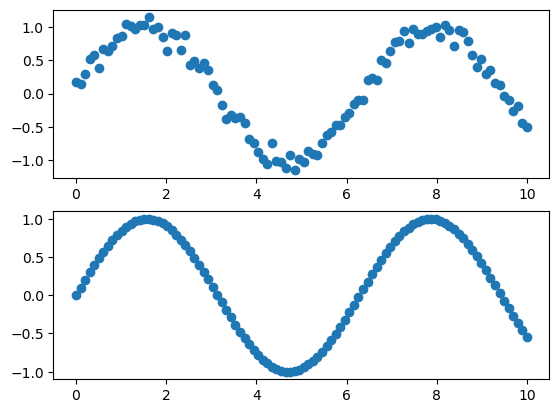

In [39]:
X=np.linspace(0,10,100)
Y=np.sin(X)
np.random.seed(0)
y=np.sin(X)+np.random.normal(0,0.1,size=X.shape[0]) 
#normal(mean, std, size ) which here is size=100
#it is used to create random values along y axis 
plt.subplot(2,1,1)
plt.scatter(X,y)
plt.subplot(2,1,2)
plt.scatter(X,Y)

In [61]:
from sklearn.tree import DecisionTreeRegressor 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [62]:
print(X_train.shape)
print(y.shape)
X_train[:3]

(75,)
(100,)


array([ 4.84848485,  0.60606061, 10.        ])

In [63]:
#reshaping the data for compatibiltity 
X_train=X_train.reshape(-1,1)
X_test=X_test.reshape(-1,1)
print(X_train.shape)
X_train[:5]


(75, 1)


array([[ 4.84848485],
       [ 0.60606061],
       [10.        ],
       [ 8.28282828],
       [ 7.67676768]])

In [64]:
regressor=DecisionTreeRegressor(max_depth=5)
regressor.fit(X_train,y_train)
#predicting 
y_pred=regressor.predict(X_test)


In [65]:
print(X_test.shape,y_test.shape)

(25, 1) (25,)


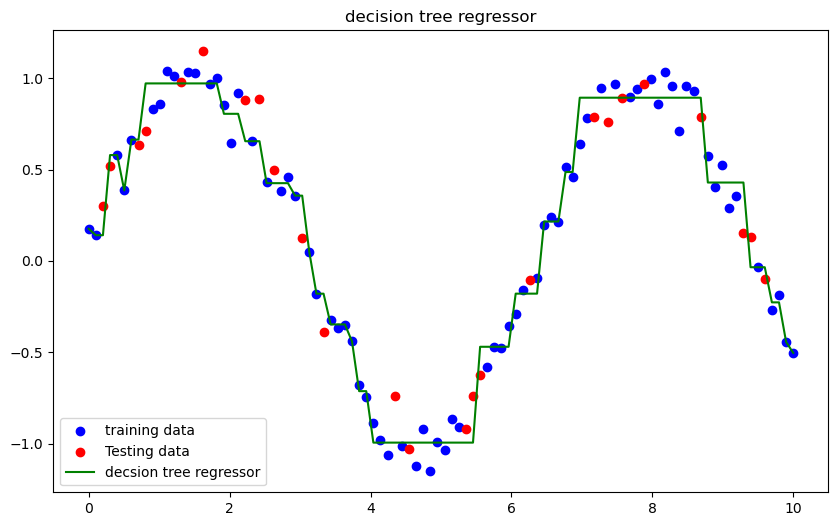

In [70]:
#plotting the results 
plt.figure(figsize=(10,6))
plt.scatter(X_train,y_train,c='b',label='training data')
plt.scatter(X_test,y_test,c='r',label='Testing data')
plt.plot(X,regressor.predict(X.reshape(-1,1)),c='g',label='decsion tree regressor')
plt.title('decision tree regressor')
plt.legend()

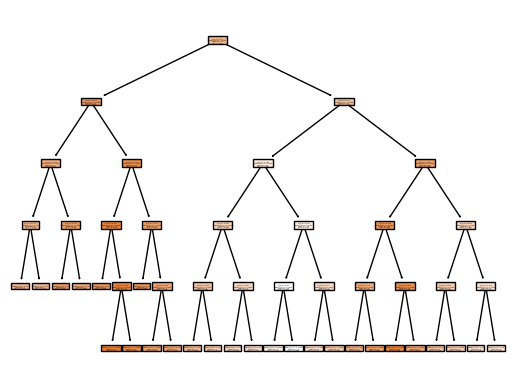

In [72]:
from sklearn import tree 
tree.plot_tree(regressor,filled=True);

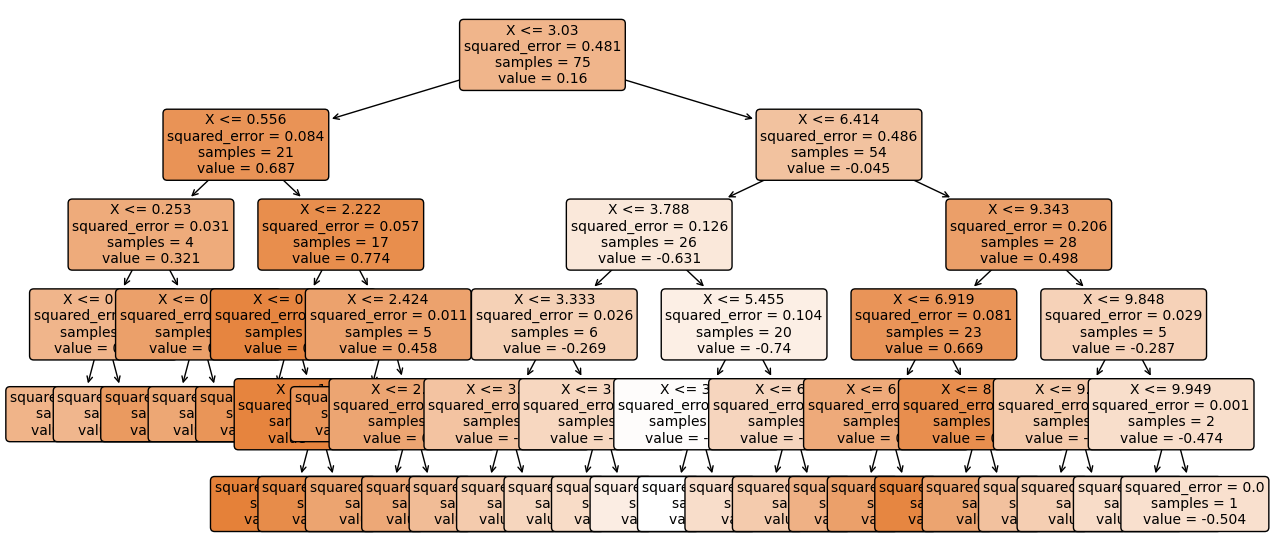

In [80]:
plt.figure(figsize=(15,7))
tree.plot_tree(regressor,filled=True,feature_names=['X'],rounded=True,fontsize=10);
#all the values